In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.stats import linregress as linregress
from scipy.signal import find_peaks as fpeaks
from scipy.signal import peak_widths as peak_widths
from scipy.fftpack import fftshift
from scipy import interpolate as spInt
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [2]:
x = np.arange(0, 256)

In [3]:
N = x.shape

In [4]:
o = (2.0*np.pi) * (1.0 / 60)
a = 1/20
A = 1.0 #0.125

In [7]:
f = (0 + np.cos(o*x)) #/2
g = A * np.exp(-a * x)
h = np.multiply(f,g)
k = np.convolve(h, h[::-1], mode='same')

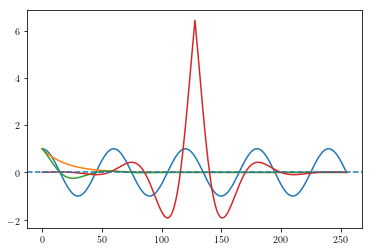

In [10]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(x[0:256], A*f[0:256])
ax1.plot(x[0:256], g[0:256])
ax1.plot(x[0:256], h[0:256])
ax1.plot(x[0:256], k[0:256])
ax1.axhline(0.0, linestyle='--')
#ax1.set_ylim(bottom=0.0, top=0.15)

In [9]:
n = f.shape[-1]

In [10]:
w = fftfreq(n)

In [11]:
F = fft(f)
G = fft(g)
H = fft(h)
F_A = np.abs(F)
G_A = np.abs(G)
H_A = np.abs(H)
F_R = 2.0 * np.real(F)
G_R = 2.0 * np.real(G)
H_R = 2.0 * np.real(H)

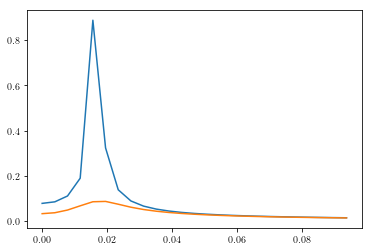

In [13]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(w[0:25], 2.0/n * F_A[0:25])
ax2.plot(w[0:25], 2.0/n * H_A[0:25])
#ax2.plot(w[0:25], 2.0/n * G[0:25])
#ax2.plot(w[0:25], 2.0/n * H[0:25])
#ax2.axvline(1.0 / 60)
#ax2.plot(w, G)

In [228]:
np.argmax(F)

0

In [31]:
w2 = w*(2.0*np.pi)

In [32]:
GG = 1 / (a + 1j*w2)
HH = np.multiply( a + 1j*w2, A/(o**2 + np.power(a + 1j*w2, 2)))

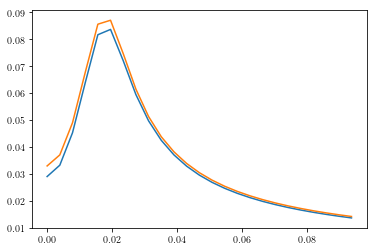

In [38]:
fig3, ax3 = plt.subplots(facecolor="white")
#ax3.plot(w[0:100]/(2.0*np.pi), np.abs(GG)[0:100])
ax3.plot(w[0:25], (2.0 / n) * np.abs(HH)[0:25])# / (2.0 * np.pi))
ax3.plot(w[0:25], (2.0/n) * H_A[0:25])
#ax3.axvline(1)

In [39]:
H1 = np.abs(2.0 / n * H)
HR1 = np.real( (2.0 / n ) * H)
HH1 = np.abs(HH) / (2.0 * np.pi)
GG1 = np.abs(GG) / (2.0 * np.pi)

In [40]:
H2 = (H1 - (np.max(H1) / 2))[0:128]
argmax1 = np.argmax(H2)
spline1 = spInt.InterpolatedUnivariateSpline(w[0:128], H2)
roots1 = spline1.roots()
HR2 = (HR1 - (np.max(HR1) / 2))[0:128]
argmaxR1 = np.argmax(HR2)
splineR1 = spInt.InterpolatedUnivariateSpline(w[0:128], HR2)
rootsrR1 = splineR1.roots()

In [241]:
HH2 = (HH1 - (np.max(HH1) / 2))[0:128]
argmax2 = np.argmax(HH2)
spline2 = spInt.InterpolatedUnivariateSpline(w[0:128], HH2)
roots2 = spline2.roots()

In [242]:
GG2 = (GG1 - (np.max(GG1) / 2))[0:128]
argmax3 = np.argmax(GG2)
spline3 = spInt.InterpolatedUnivariateSpline(w[0:128], GG2)
roots3 = spline3.roots()

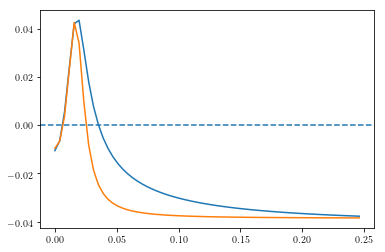

In [42]:
fig3, ax3 = plt.subplots(facecolor="white")
ax3.plot(w[0:64], H2[0:64])
ax3.plot(w[0:64], HR2[0:64])

#ax3.plot(w[0:64], G2[0:64], label=r'$\epsilon_r=10.0$')
#ax3.plot(w[0:64], G3[0:64], label=r'$\epsilon_r=100.0$')
#ax3.plot(w[0:64], G4[0:64], label=r'$\epsilon_r=1000.0$')
ax3.axhline(0.0, linestyle='--')
#ax3.set_xlabel(r'$\omega$')
#ax3.set_ylabel(r'$\langle C(\omega)\rangle$')
#ax2.set_ylim(bottom=-0.02, top=0.12)
#ax3.legend(fontsize='large')

In [152]:
HWL1 = roots1[-2]
HWR1 = roots1[-1]
for j in range(roots1.shape[-1] - 1):
    if roots1[j] < w[argmax1] and roots1[j+1] > w[argmax1]:
        HWL1 = roots1[j]
        HWR1 = roots1[j + 1]
FW1 = HWR1 - HWL1

In [153]:
HWL2 = roots2[-2]
HWR2 = roots2[-1]
for j in range(roots2.shape[-1] - 1):
    if roots2[j] < w[argmax2] and roots2[j+1] > w[argmax2]:
        HWL2 = roots2[j]
        HWR2 = roots2[j + 1]
FW2 = HWR2 - HWL2

In [154]:
FW1

0.4417657819833972

In [134]:
FW2

0.4417874211154915